In [261]:
from __future__ import division
import sys

import numpy as np

import epi_prediction

np.random.seed(seed=1234)

## Get Best F1 Scores

In [43]:
src_dir="/Users/johnbonihalab/data/chuyu/modalities/"
kmat, k_labels_arr = epi_prediction.load_mat_and_labels(src_dir, "kmean")

####################################################################

In [45]:
ksearch = epi_prediction.run(kmat, k_labels_arr)

----------------------------------------------------------------------------------------------------
###################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

In [46]:
ksearch.best_score_

0.75274902874902916

In [47]:
ksearch.best_params_

{'svc__C': 3.7539389371314869}

In [48]:
ksearch.best_estimator_

Pipeline(steps=[('masker', SimpleMaskerPipeline(threshold=0.2)), ('anova', SelectKBest(k=500, score_func=<function f_classif at 0x10ecc2320>)), ('svc', SVC(C=3.7539389371314869, cache_size=200, class_weight=None, coef0=0.0,
  degree=3, gamma=0.0, kernel='linear', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False))])

In [52]:
ksearch.grid_scores_

[mean: 0.72891, std: 0.15114, params: {'svc__C': 0.74943994942852954},
 mean: 0.73057, std: 0.13019, params: {'svc__C': 2.2840100575986182},
 mean: 0.72860, std: 0.13926, params: {'svc__C': 0.65461604284429509},
 mean: 0.70953, std: 0.14642, params: {'svc__C': 3.4276595770504623},
 mean: 0.72201, std: 0.14723, params: {'svc__C': 4.0908782139760422},
 mean: 0.75275, std: 0.12504, params: {'svc__C': 3.7539389371314869},
 mean: 0.70908, std: 0.16536, params: {'svc__C': 2.8536465154704205},
 mean: 0.74986, std: 0.12763, params: {'svc__C': 3.4004982666177606},
 mean: 0.74853, std: 0.13528, params: {'svc__C': 2.3405569239965764},
 mean: 0.73365, std: 0.13002, params: {'svc__C': 2.2186154555443918}]

In [53]:
ksearch.cv

StratifiedShuffleSplit(labels=[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], n_iter=100, test_size=0.166666666667, random_state=None)

In [54]:
dmean_mat, dmean_labels_arr = epi_prediction.load_mat_and_labels(src_dir, "dmean")
dmean_search = epi_prediction.run(dmean_mat, dmean_labels_arr)

####################################################################----------------------------------------------------------------------------------------------------
###############################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

In [55]:
dmean_search.best_score_

0.70214407814407864

In [56]:
dmean_search.grid_scores_

[mean: 0.68904, std: 0.13537, params: {'svc__C': 0.74943994942852954},
 mean: 0.65874, std: 0.15990, params: {'svc__C': 2.2840100575986182},
 mean: 0.66886, std: 0.13759, params: {'svc__C': 0.65461604284429509},
 mean: 0.67608, std: 0.14021, params: {'svc__C': 3.4276595770504623},
 mean: 0.67582, std: 0.13968, params: {'svc__C': 4.0908782139760422},
 mean: 0.66512, std: 0.13235, params: {'svc__C': 3.7539389371314869},
 mean: 0.67466, std: 0.13643, params: {'svc__C': 2.8536465154704205},
 mean: 0.70206, std: 0.12092, params: {'svc__C': 3.4004982666177606},
 mean: 0.70214, std: 0.12020, params: {'svc__C': 2.3405569239965764},
 mean: 0.68462, std: 0.14210, params: {'svc__C': 2.2186154555443918}]

In [57]:
fa_mat, fa_labels_arr = epi_prediction.load_mat_and_labels(src_dir, "fa")
fa_search = epi_prediction.run(fa_mat, fa_labels_arr)

####################################################################----------------------------------------------------------------------------------------------------
###############################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

In [58]:
fa_search.grid_scores_

[mean: 0.70894, std: 0.13420, params: {'svc__C': 0.74943994942852954},
 mean: 0.65548, std: 0.12861, params: {'svc__C': 2.2840100575986182},
 mean: 0.70227, std: 0.13130, params: {'svc__C': 0.65461604284429509},
 mean: 0.63296, std: 0.15981, params: {'svc__C': 3.4276595770504623},
 mean: 0.66183, std: 0.15611, params: {'svc__C': 4.0908782139760422},
 mean: 0.60504, std: 0.15734, params: {'svc__C': 3.7539389371314869},
 mean: 0.64823, std: 0.14448, params: {'svc__C': 2.8536465154704205},
 mean: 0.62691, std: 0.16356, params: {'svc__C': 3.4004982666177606},
 mean: 0.66272, std: 0.14924, params: {'svc__C': 2.3405569239965764},
 mean: 0.67864, std: 0.14321, params: {'svc__C': 2.2186154555443918}]

In [59]:
fa_search.best_score_

0.7089353979353985

## Calculate Coefficients and F1 Array

In [149]:
white_matter = epi_prediction.SimpleMasker('masks/white.nii', threshold=.2)

def stack_or_set(m, row):
    return row if m is None else np.vstack((m, row))

def calc_coeffs(best_estimator, cv, mat, labels_arr, ret=dict(expected=None, predicted=None)):
    n_iter = cv.n_iter
    print('-' * n_iter)
    
    svc = best_estimator.named_steps['svc']
    anova = best_estimator.named_steps['anova']
    def fit(train):
        best_estimator.fit(mat[train], labels_arr[train])
        
    def predict(test):
        expected = labels_arr[test]
        predicted = best_estimator.predict(mat[test])
        ret['expected'] = stack_or_set(ret['expected'], expected)
        ret['predicted'] = stack_or_set(ret['predicted'], predicted)

    def coeffs_fn():
        sys.stdout.write('#')
        svc_coef = svc.coef_.copy()
        return white_matter.inv_transform(anova.inverse_transform(svc_coef))

    coeffs = epi_prediction.calc_coeffs(cv, fit, coeffs_fn, predict)
    info = epi_prediction.CvInfo(ret['expected'], ret['predicted'])
    return coeffs, info
    

In [153]:
kmean_coeffs, kmean_coeffs_info = calc_coeffs(ksearch.best_estimator_, ksearch.cv, kmat, k_labels_arr)

----------------------------------------------------------------------------------------------------
####################################################################################################

In [154]:
dmean_coeffs, dmean_coeffs_info = calc_coeffs(dmean_search.best_estimator_, dmean_search.cv, 
                                              dmean_mat, dmean_labels_arr)

----------------------------------------------------------------------------------------------------
####################################################################################################

In [155]:
fa_coeffs, fa_coeffs_info = calc_coeffs(fa_search.best_estimator_, fa_search.cv, fa_mat, fa_labels_arr)

----------------------------------------------------------------------------------------------------
####################################################################################################

## Statistically Compare F1 Scores

In [184]:
from scipy import stats

In [188]:
mn = lambda inf: (np.mean(inf.f1_scores()), np.std(inf.f1_scores()))

print mn(kmean_coeffs_info), mn(fa_coeffs_info), mn(dmean_coeffs_info)

(0.70373458795788901, 0.13199204140559936) (0.69085291313014086, 0.13632473223047917) (0.69414036975613336, 0.12604779282097267)


In [178]:
stats.ttest_1samp(kmean_coeffs_info.f1_scores(), .5)

Ttest_1sampResult(statistic=15.588958662083206, pvalue=9.5449443146656774e-29)

In [179]:
stats.ttest_1samp(dmean_coeffs_info.f1_scores(), .5)

Ttest_1sampResult(statistic=21.890530771027631, pvalue=3.1934750533723207e-55)

In [180]:
stats.ttest_1samp(fa_coeffs_info.f1_scores(), .5)

Ttest_1sampResult(statistic=24.32918783761982, pvalue=3.8556800891205168e-73)

In [181]:
stats.ttest_ind(kmean_coeffs_info.f1_scores(), fa_coeffs_info.f1_scores())

Ttest_indResult(statistic=0.83305934800510339, pvalue=0.405303472397333)

In [182]:
stats.ttest_ind(kmean_coeffs_info.f1_scores(), dmean_coeffs_info.f1_scores())

Ttest_indResult(statistic=0.61718045986978498, pvalue=0.53757768145627505)

In [183]:
stats.ttest_ind(dmean_coeffs_info.f1_scores(), fa_coeffs_info.f1_scores())

Ttest_indResult(statistic=0.27342727297619801, pvalue=0.7846368000221029)

## Plot Coefficients

In [156]:
import IPython
from IPython.html.widgets import interact, interactive
from IPython.html.widgets.widget_float import FloatSlider

def save_and_plot(coeffs, title, save, **kwargs):
    affine = white_matter._mask_image.get_affine()
    kwargs['title'] = title
    epi_prediction.plot_coeffs(coeffs, affine, **kwargs)

    if save:
        output_file = title+'_color'
        print "about to save " + output_file
        kwargs['output_file'] = output_file
        epi_prediction.plot_coeffs(coeffs, affine, **kwargs)
        print "saved " + output_file

nd_slider = FloatSlider(min=0, max=1, step=0.1, value=.7)
pd_slider = FloatSlider(min=0, max=1, step=0.1, value=.7)

about to save MK_color
saved MK_color


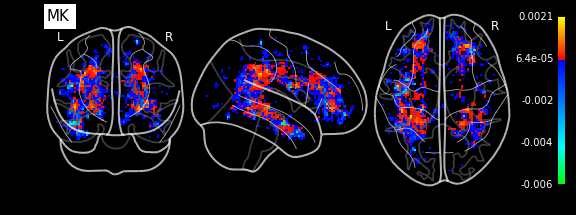

In [159]:
def plot_kmean_coeffs(save, **kwargs):
    save_and_plot(kmean_coeffs, "MK", save, **kwargs)

w=interactive(plot_kmean_coeffs, save=False, neg_disp=nd_slider, pos_disp=pd_slider, 
              plot_abs=False, colorbar=True, black_bg=True, symmetric_cbar=False)
IPython.display.display(w)

about to save MD_color
saved MD_color


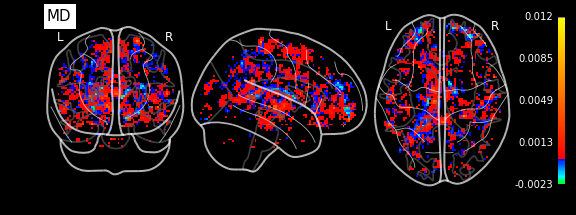

In [160]:
def plot_dmean_coeffs(save, **kwargs):
    save_and_plot(dmean_coeffs, "MD", save, **kwargs)

w=interactive(plot_dmean_coeffs, save=False, neg_disp=nd_slider, pos_disp=pd_slider, 
              plot_abs=False, colorbar=True, black_bg=True, symmetric_cbar=False)
IPython.display.display(w)

about to save FA_color
saved FA_color


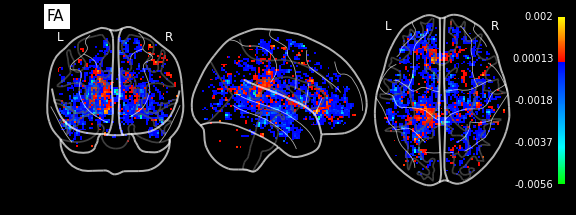

In [162]:
def plot_fa_coeffs(save, **kwargs):
    save_and_plot(fa_coeffs, "FA", save, **kwargs)

w=interactive(plot_fa_coeffs, save=False, neg_disp=nd_slider, pos_disp=pd_slider, 
              plot_abs=False, colorbar=True, black_bg=True, symmetric_cbar=False)
IPython.display.display(w)

# Ensemble Anlysis

In [194]:
def load_mat(mod):
    return epi_prediction.load_mat_and_labels(src_dir, mod)[0]

ensemble_mat = np.hstack([load_mat('dmean'), load_mat('fa'), load_mat('kmean')])

labels = epi_prediction.load_mat_and_labels(src_dir, 'dmean')[1]

dist = int(ensemble_mat.shape[1]/3)
index_map = {"dmean": (0, dist),
             "fa":  (dist, 2 * dist),
             "kmean": (2*dist, 3*dist)}

################################################################################################################################################################################################################################################################################

In [287]:
dmean_params, kmean_params, fa_params = [{w[-1]: bp[w]}
 for bp in (dmean_search.best_params_, ksearch.best_params_, fa_search.best_params_)
 for w in bp]
params_map = {'dmean': dmean_params, 'fa': fa_params, 'kmean': kmean_params}

In [278]:
def calc_f1s_ens(index_map=index_map, params_map=params_map, ret=dict(expected=None, predicted=None)):
    from sklearn.cross_validation import StratifiedShuffleSplit
    
    ensemble_alg = epi_prediction.ensemble_alg(index_map, params_map)
    
    n_iter = 100
    cv = StratifiedShuffleSplit(labels, n_iter=n_iter, test_size=1/6.0)
    print('-' * n_iter)
    
    for train, test in cv:
        sys.stdout.write('#')
        ensemble_alg.fit(ensemble_mat[train], labels[train])
        
        expected = labels[test]
        predicted = ensemble_alg.predict(ensemble_mat[test]).flatten()
        
        ret['expected'] = stack_or_set(ret['expected'], expected)
        ret['predicted'] = stack_or_set(ret['predicted'], predicted)

    info = epi_prediction.CvInfo(ret['expected'], ret['predicted'])
    return info
    

In [279]:
ens_infos = calc_f1s_ens()

----------------------------------------------------------------------------------------------------
####################################################################################################

In [280]:
np.mean(ens_infos.f1_scores())

0.76458547008547018

In [281]:
stats.ttest_ind(ens_infos.f1_scores(), kmean_coeffs_info.f1_scores())

Ttest_indResult(statistic=3.2650223238793465, pvalue=0.0012866406179790583)

In [282]:
stats.ttest_ind(ens_infos.f1_scores(), dmean_coeffs_info.f1_scores())

Ttest_indResult(statistic=4.4858176755646584, pvalue=1.0346615508354343e-05)

In [283]:
stats.ttest_ind(ens_infos.f1_scores(), fa_coeffs_info.f1_scores())

Ttest_indResult(statistic=4.7130326280096266, pvalue=3.3717520712066141e-06)

In [284]:
stats.ttest_1samp(ens_infos.f1_scores(), .5)

Ttest_1sampResult(statistic=19.912173805770028, pvalue=2.1373311410164346e-36)

## Good Results, Compare With Removing Single Modalities

In [285]:
def rm_key(d, k):
    ret = d.copy()
    del ret[k]
    return ret

In [289]:
strip_input = lambda k: (rm_key(index_map, k), rm_key(params_map, k))

ens_infos_no_dmean = calc_f1s_ens(*strip_input('dmean'))
print('')
ens_infos_no_fa = calc_f1s_ens(*strip_input('fa'))
print('')
ens_infos_no_kmean = calc_f1s_ens(*strip_input('kmean'))
print('')

----------------------------------------------------------------------------------------------------
####################################################################################################
----------------------------------------------------------------------------------------------------
####################################################################################################
----------------------------------------------------------------------------------------------------
####################################################################################################


In [291]:
stats.ttest_ind(ens_infos.f1_scores(), ens_infos_no_dmean.f1_scores())

Ttest_indResult(statistic=-0.71274728439772894, pvalue=0.47655986321920518)

In [292]:
stats.ttest_ind(ens_infos.f1_scores(), ens_infos_no_kmean.f1_scores())

Ttest_indResult(statistic=0.84939789868327387, pvalue=0.39606805683025303)

In [293]:
stats.ttest_ind(ens_infos.f1_scores(), ens_infos_no_fa.f1_scores())

Ttest_indResult(statistic=-0.013159815408081461, pvalue=0.98950688350024718)

In [294]:
stats.ttest_ind(ens_infos_no_kmean.f1_scores(), kmean_coeffs_info.f1_scores())

Ttest_indResult(statistic=3.3759779699308283, pvalue=0.00079267664906075108)

In [306]:
epi_prediction.ttest_ind_one_tail(ens_infos_no_kmean.f1_scores(), kmean_coeffs_info.f1_scores())

Ttest_indResult(statistic=3.3759779699308283, pvalue=0.00039633832453037554)

In [308]:
epi_prediction.ttest_1samp_one_tail(ens_infos_no_kmean.f1_scores(), .5)

Ttest_1sampResult(statistic=39.002691237481542, pvalue=1.6461626930159032e-138)